# **DATA ANALYSIS PYTHON PROJECT - BLINKIT ANALYSIS**

### Import Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import Raw Data and Displaying them

In [3]:
df = pd.read_csv('BlinkIT Grocery Data.csv')
df.head(10)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0
5,low fat,FDS52,Frozen Foods,2020,OUT017,Tier 2,Small,Supermarket Type1,0.005505,8.89,102.4016,5.0
6,Low Fat,NCU05,Health and Hygiene,2011,OUT010,Tier 3,Small,Grocery Store,0.098312,11.80,81.4618,5.0
7,Low Fat,NCD30,Household,2015,OUT045,Tier 2,Small,Supermarket Type1,0.026904,19.70,96.0726,5.0
8,Low Fat,FDW20,Fruits and Vegetables,2014,OUT013,Tier 3,High,Supermarket Type1,0.024129,20.75,124.1730,5.0
9,Low Fat,FDX25,Canned,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.101562,NaN,181.9292,5.0


### Data Cleaning

In [4]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat' 'low fat' 'LF' 'reg']


In [5]:
df['Item Fat Content'] = df['Item Fat Content'].replace({'LF': 'Low Fat', 
                                                         'reg': 'Regular', 
                                                         'low fat': 'Low Fat',})   

In [6]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat']


## Business Requirements

### KPI's Requirements

In [7]:
# 1. Total Sales
total_sales = df['Sales'].sum()

# 2. Average Sales
average_sales = df['Sales'].mean()

# 3. No of Items Sold
total_items_sold = df['Sales'].count()

# 4. Average Ratings
average_rating = df['Rating'].mean()


print(f"Total Sales: ${total_sales:,.0f}")
print(f"Average Sales: ${average_sales:,.0f}")
print(f"No. of Items Sold: {total_items_sold}")
print(f"Average Rating: {average_rating:,.0f}")

Total Sales: $1,201,681
Average Sales: $141
No. of Items Sold: 8523
Average Rating: 4


### Chart's Requirements

#### Total Sales by Fat Content

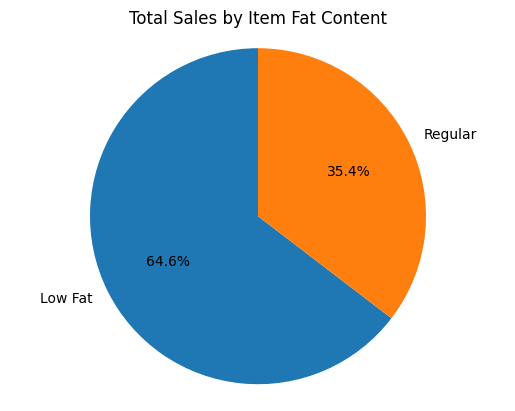

In [12]:
sales_by_fat_content = df.groupby('Item Fat Content')['Sales'].sum()
plt.pie(sales_by_fat_content, labels=sales_by_fat_content.index, autopct='%.1f%%', startangle=90)

plt.title('Total Sales by Item Fat Content')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#### Total Sales by Item Type

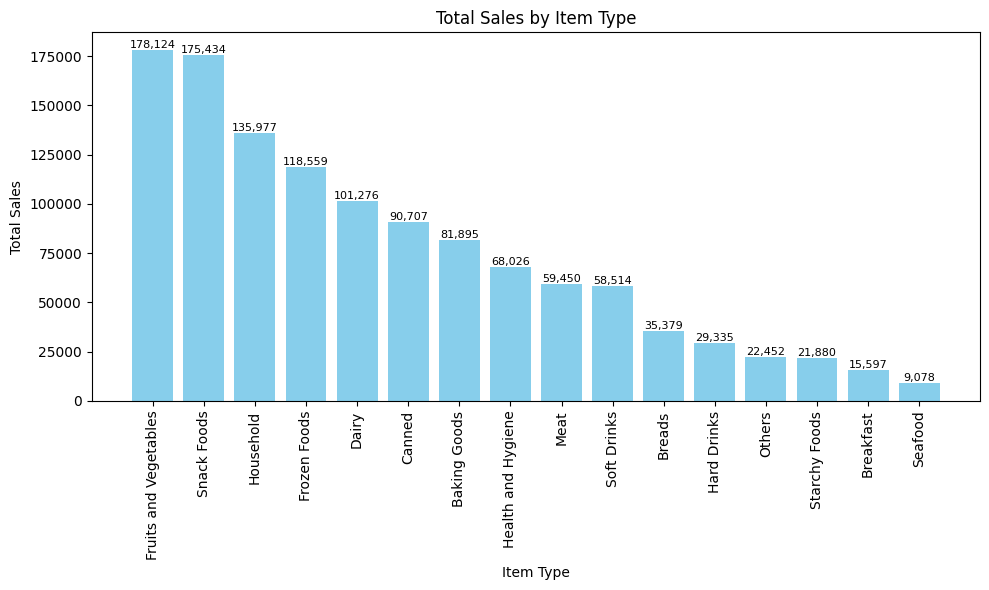

In [21]:
sales_by_item_type = df.groupby('Item Type')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
bars = plt.bar(sales_by_item_type.index, sales_by_item_type.values, color='skyblue')
plt.xticks(rotation=90)
plt.title('Total Sales by Item Type')
plt.xlabel('Item Type') 
plt.ylabel('Total Sales')

for bar in bars : 
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{bar.get_height():,.0f}', ha='center', va='bottom', fontsize=8)
    
plt.tight_layout()
plt.show()

#### Fat Content by Outlet for Total Sales

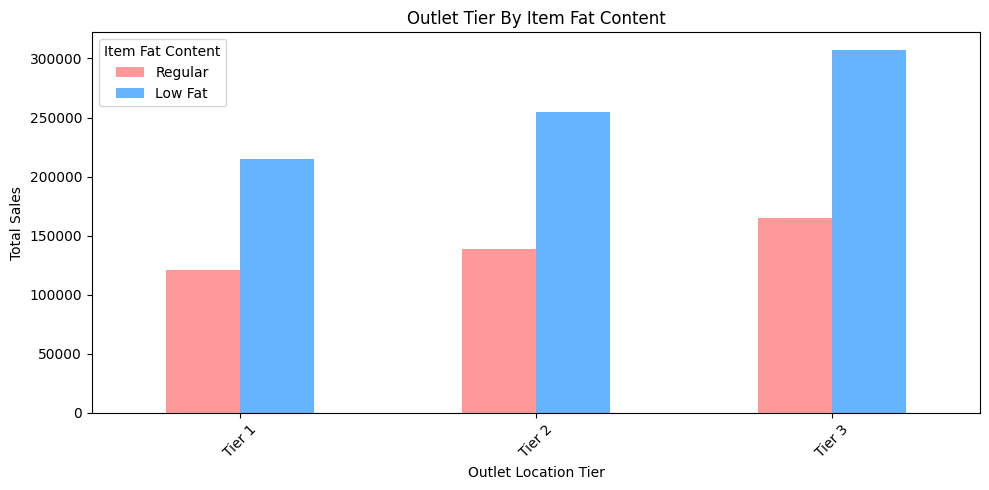

In [25]:
grouped = df.groupby(['Outlet Location Type', 'Item Fat Content'])['Sales'].sum().unstack()
grouped = grouped[['Regular', 'Low Fat']]

ax = grouped.plot(kind='bar', figsize=(10, 5), title = 'Outlet Tier By Item Fat Content', color=['#FF9999', '#66B3FF'])
plt.xlabel('Outlet Location Tier')
plt.ylabel('Total Sales')
plt.legend(title='Item Fat Content')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Total Sales by Outlet Establishment

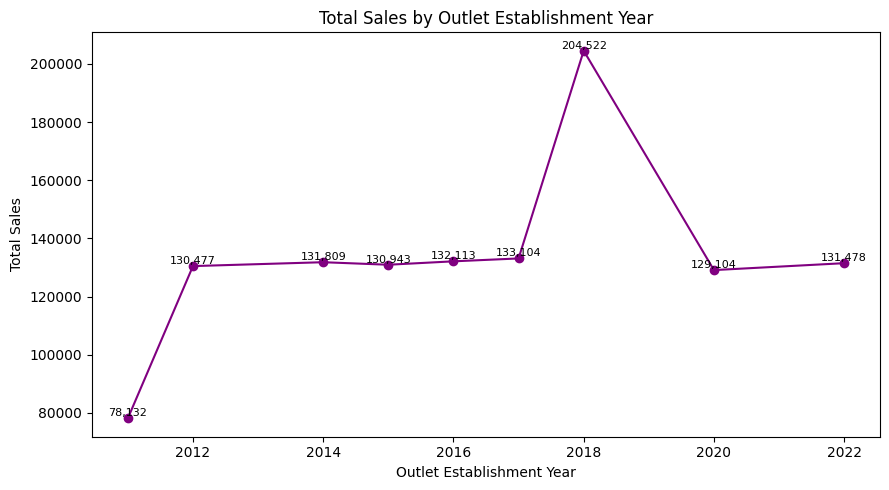

In [33]:
sales_by_outlet_establishment = df.groupby('Outlet Establishment Year')['Sales'].sum().sort_index()

plt.figure(figsize=(9, 5))
plt.plot(sales_by_outlet_establishment.index, sales_by_outlet_establishment.values, marker='o', linestyle = '-' , color='purple')

plt.title('Total Sales by Outlet Establishment Year')
plt.xlabel('Outlet Establishment Year')
plt.ylabel('Total Sales')

for x,y in zip(sales_by_outlet_establishment.index, sales_by_outlet_establishment.values):
    plt.text(x, y, f'{y:,.0f}', ha='center', va='bottom', fontsize=8)
    
plt.tight_layout()
plt.show()

#### Sales by Outlet Size

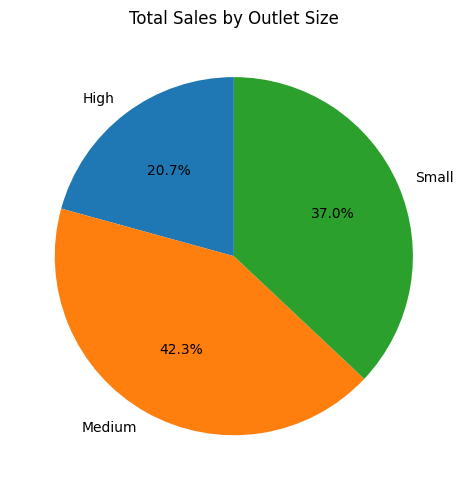

In [43]:
sales_by_size = df.groupby('Outlet Size')['Sales'].sum()
plt.figure(figsize=(5,5))
plt.pie(sales_by_size, labels=sales_by_size.index, autopct='%.1f%%', startangle=90)
plt.title('Total Sales by Outlet Size')
plt.tight_layout()
plt.show()

#### Sales By Outlet Location

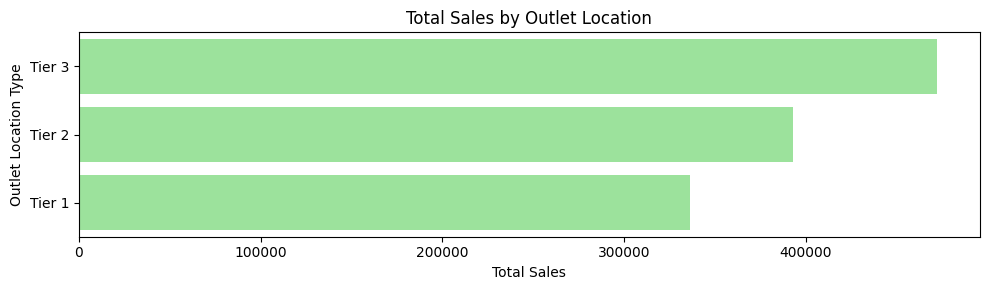

In [40]:
sales_by_outlet_location = df.groupby('Outlet Location Type')['Sales'].sum().reset_index()
sales_by_outlet_location = sales_by_outlet_location.sort_values('Sales', ascending=False)

plt.figure(figsize=(10, 3))
ax = sns.barplot(x='Sales', y='Outlet Location Type', data=sales_by_outlet_location, color='lightgreen')

plt.title('Total Sales by Outlet Location')
plt.xlabel('Total Sales')
plt.ylabel('Outlet Location Type')  

plt.tight_layout()
plt.show()